<div style="background-color: rgba(0, 0, 0, 0.7); color: #fff; padding: 10px; border-radius: 8px; box-shadow: 0 2px 4px rgba(0,0,0,0.2); width: fit-content;">
  <h1 style="font-size: 24px; margin: 0;">  Extend Model to Detect More Species:</h1>
</div>



The Echo Engine was originally capable of classifying just 121 of the 340 known sound-producing animal species native to the Otways region. Through an expanded and curated data collection effort, the model has been significantly enhanced and now supports classification across **269 distinct species**, with a total of **8,390 sound samples**—greatly improving its coverage and ecological utility.

This task involved sourcing validated animal sound recordings, generating corresponding spectrograms, and retraining the model using an updated neural network architecture to accommodate the increased class diversity.

---

##  Model Overview

### ResNet18 Classifier for Animal Sound Spectrograms

The model is based on **ResNet18**, a convolutional neural network pretrained on ImageNet, and fine-tuned for classifying animal vocalizations represented as spectrogram images.

###  Training Configuration

- **Architecture**: ResNet18 (pretrained, final layer replaced for 269-class output)
- **Input Size**: 224 × 224 RGB spectrogram images
- **Classes**: 269 animal species
- **Dataset Size**: 8,390 samples  
  - **Split**: 80% training, 10% validation, 10% testing
- **Loss Function**: CrossEntropyLoss
- **Optimizer**: Adam (learning rate: 0.001)
- **Learning Rate Scheduler**: ReduceLROnPlateau (patience: 2, factor: 0.5)
- **Epochs**: 10
- **Image Augmentations**:
  - Random horizontal flip  
  - Random rotation  
  - Color jitter (brightness and contrast)


### Why This Matters
The original Echo Engine supported only a subset of species—121 out of 340 known sound-producing animals in the region. This limited its effectiveness in providing a comprehensive understanding of the acoustic landscape.

By expanding the model to recognize 269 species, we significantly improve its coverage and relevance


### Data Sources

The audio recordings used to train the Echo Engine model were sourced from reputable and publicly available wildlife sound repositories. These include:

- **[Xeno-Canto](https://www.xeno-canto.org/)**  
  A global community-driven platform that collects and shares bird and animal vocalizations from around the world. The majority of sound samples in this project were sourced from Xeno-Canto, focusing on species known to inhabit the Otways region of Victoria, Australia.
  
- To support future development, we maintain an Excel tracking file that lists all species currently included in the dataset, along with their sourcing status. please refer to and update this file when adding new species to maintain consistency and support ongoing dataset growth.


You can find the updated sound recordings at the following link:  
[https://drive.google.com/drive/folders/1VHutT83YhaUzPw6wKI_hjFeF1GRUb8hO?usp=sharing]

These files include **newly added species** that were not part of the original dataset.   It does not include the original sounds sourced from the cloud bucket 


##  Future Improvements

While the current model successfully classifies **269 species**, our goal is to extend support to all **340 known sound-producing species** native to the Otways region.

To achieve this, future work will focus on:

- **Expanding the dataset** by sourcing and integrating recordings for the remaining 71 species  
- **Validating and annotating** new audio samples from trusted repositories such as Xeno-Canto and the Atlas of Living Australia  
- **Continuously retraining the model** to maintain accuracy and adaptability as new data is added  
- **Improving the model architecture and training strategies** to handle greater species diversity with improved generalization




## Script: Download and Integrate New Animal Sound Folders from Google Drive

This Python script automates the process of:

1. **Downloading a public folder** containing new animal sound recordings from a shared Google Drive link using the `gdown` library.
2. **Moving the downloaded folders** (each representing a species) into the `audio_root` directory used by the Echo Engine model.
3. **Avoiding duplicates** by skipping folders that already exist.
4. **Cleaning up** the temporary download directory after the files are transferred.

---






## Alternative: Script to Import New Animal Sound Folders from Google Drive

This script downloads a shared Google Drive folder using `gdown` and moves the species subfolders into: 
Note: please replace with your name 

```
C:\Users\riley\Documents\Project-Echo\src\Prototypes\data\data_files
```
**Note: please replace with your name**
- Skips folders that already exist  
- Cleans up temporary files after moving  
- Requires the Drive folder to be set to “Anyone with the link”


In [6]:
!pip install gdown


In [ ]:
# Step 2: Import required modules
import gdown
import os
import shutil

# Step 3: Define the public Google Drive folder URL
url = "https://drive.google.com/drive/folders/1MP1j_oiMGL6hWWMrPcuJYsKLSUH8gjp_"
download_dir = "downloaded_sounds"

# Step 4: Download the folder from Google Drive
gdown.download_folder(
    url=url,
    output=download_dir,
    quiet=False,
    use_cookies=False
)

# Step 5: Define your local target audio directory
audio_root = r"C:\Users\riley\Documents\Project-Echo\src\Prototypes\data\data_files"

# Step 6: Move downloaded folders into the audio_root directory
for folder_name in os.listdir(download_dir):
    src = os.path.join(download_dir, folder_name)
    dst = os.path.join(audio_root, folder_name)

    if os.path.isdir(src):
        if not os.path.exists(dst):
            shutil.move(src, dst)
            print(f"Moved: {folder_name}")
        else:
            print(f"Skipped (already exists): {folder_name}")

# Step 7: Clean up temporary download directory
if os.path.exists(download_dir):
    shutil.rmtree(download_dir)
    print(" Cleaned up temporary folder:", download_dir)

print("New species folders have been integrated into:", audio_root)

Retrieving folder contents


Retrieving folder 1HcU7uzAT6d6EjCsEH0-vCp4ujqX9M4uf Accipiter cirrocephalus
Processing file 1uWs3rkiGGFfYAJwJAKsLs8zTZfTmRgqI Accipiter cirrocephalus 1.mp3
Processing file 1quPak3b1QBbbXDxewE34m0fsHh2gOY3k Accipiter cirrocephalus 2.mp3
Processing file 1keDVhfLz7SHJHk-HOIgBOlSTauMlLsGL Accipiter cirrocephalus 4.mp3
Processing file 16v_J29g8MSlHw__V1jiCpNwayl6hMyv3 Accipiter cirrocephalus 5.mp3
Retrieving folder 1lRo14d_3lBaVSk9bnTs2cxtLchsMD1ae Accipiter fasciatus
Processing file 1kpzEP--PWN6r5VrJBgaLhh5LusAKgYDd Accipiter fasciatus.mp3
Retrieving folder 15RICxLgJDVTNfj-JU2LKvI7qY13OttC_ Accipiter novaehollandiae
Processing file 1EGeFn19kfd2PijVwIAycNgjGsCmsczrv Accipiter novaehollandiae 1.mp3
Processing file 1JqLAno-5a0I9MaK7G9T08FHLWsKj38M9 Accipiter novaehollandiae 2.mp3
Processing file 17L-eADzeuNSzoLxqxaJdhyX4LROdXl0_ Accipiter novaehollandiae 3.mp3
Processing file 1gdMytIn76zUxSzPphtJ7tyh9uO6HIdeC Accipiter novaehollandiae 4.wav
Processing file 1IE_K8rFvqsD5y1YuvRJDcG96hGEU_q7U Ac

In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# input directory containing subfolders of audio files by species
audio_root = r"C:\Users\riley\Documents\Project-Echo\src\Prototypes\data\data_files"
spec_root = r"C:\Users\riley\Documents\Project-Echo\src\Prototypes\data\spectrograms"
os.makedirs(spec_root, exist_ok=True)

# Gather all audio files
all_files = [
    (species, file)
    for species in os.listdir(audio_root)
    if os.path.isdir(os.path.join(audio_root, species))
    for file in os.listdir(os.path.join(audio_root, species))
    if file.lower().endswith(('.wav', '.mp3', '.ogg')) 
]

#Collecting all (species, filename) pairs from the input directory

for species, file in tqdm(all_files, desc="Generating Spectrograms", unit="file"):
    in_path = os.path.join(audio_root, species, file)
    out_dir = os.path.join(spec_root, species)
    os.makedirs(out_dir, exist_ok=True)
    out_path = os.path.join(out_dir, os.path.splitext(file)[0] + ".png")

    try:
        y, sr = librosa.load(in_path, sr=22050, duration=5.0)
        if len(y) < sr * 5:
            y = np.pad(y, (0, sr * 5 - len(y)))

        mel = librosa.feature.melspectrogram(y=y, sr=sr)
        mel_db = librosa.power_to_db(mel, ref=np.max)

        plt.figure(figsize=(3, 3))
        librosa.display.specshow(mel_db, sr=sr)
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(out_path, bbox_inches='tight', pad_inches=0)
        plt.close()

    except Exception as e:
        print(f" Error: {species}/{file} — {e}")

✅ Found 269 classes | Total samples: 8390


Epoch 1/10: 100%|████████████████████████████████████████████████| 210/210 [03:47<00:00,  1.08s/batch, Batch Loss=2.28]


Epoch 1/10 — 238s 1136ms/step — accuracy: 0.3325 — loss: 3.1392 — val_accuracy: 0.3456 — val_loss: 3.0967


Epoch 2/10: 100%|████████████████████████████████████████████████| 210/210 [03:47<00:00,  1.08s/batch, Batch Loss=1.59]


Epoch 2/10 — 238s 1135ms/step — accuracy: 0.5338 — loss: 1.9677 — val_accuracy: 0.5459 — val_loss: 1.9616


Epoch 3/10: 100%|███████████████████████████████████████████████| 210/210 [03:47<00:00,  1.08s/batch, Batch Loss=0.845]


Epoch 3/10 — 238s 1136ms/step — accuracy: 0.6400 — loss: 1.4779 — val_accuracy: 0.6055 — val_loss: 1.6553


Epoch 4/10: 100%|███████████████████████████████████████████████| 210/210 [03:47<00:00,  1.08s/batch, Batch Loss=0.621]


Epoch 4/10 — 238s 1136ms/step — accuracy: 0.6965 — loss: 1.1912 — val_accuracy: 0.6591 — val_loss: 1.5083


Epoch 5/10: 100%|███████████████████████████████████████████████| 210/210 [03:47<00:00,  1.08s/batch, Batch Loss=0.725]


Epoch 5/10 — 238s 1137ms/step — accuracy: 0.7503 — loss: 0.9598 — val_accuracy: 0.6865 — val_loss: 1.3354


Epoch 6/10: 100%|███████████████████████████████████████████████| 210/210 [03:46<00:00,  1.08s/batch, Batch Loss=0.871]


Epoch 6/10 — 237s 1132ms/step — accuracy: 0.7898 — loss: 0.7712 — val_accuracy: 0.7175 — val_loss: 1.2805


Epoch 7/10: 100%|███████████████████████████████████████████████| 210/210 [03:47<00:00,  1.08s/batch, Batch Loss=0.707]


Epoch 7/10 — 238s 1134ms/step — accuracy: 0.8202 — loss: 0.6298 — val_accuracy: 0.6901 — val_loss: 1.3941


Epoch 8/10: 100%|███████████████████████████████████████████████| 210/210 [03:47<00:00,  1.08s/batch, Batch Loss=0.681]


Epoch 8/10 — 238s 1134ms/step — accuracy: 0.8494 — loss: 0.5256 — val_accuracy: 0.6782 — val_loss: 1.5606


Epoch 9/10: 100%|███████████████████████████████████████████████| 210/210 [03:47<00:00,  1.08s/batch, Batch Loss=0.274]


Epoch 9/10 — 238s 1136ms/step — accuracy: 0.8789 — loss: 0.4225 — val_accuracy: 0.7366 — val_loss: 1.2986


Epoch 10/10: 100%|██████████████████████████████████████████████| 210/210 [03:48<00:00,  1.09s/batch, Batch Loss=0.338]


Epoch 10/10 — 239s 1141ms/step — accuracy: 0.8941 — loss: 0.3634 — val_accuracy: 0.7592 — val_loss: 1.2580

🎯 Final Test Accuracy: 0.7378 — Test Loss: 1.2756


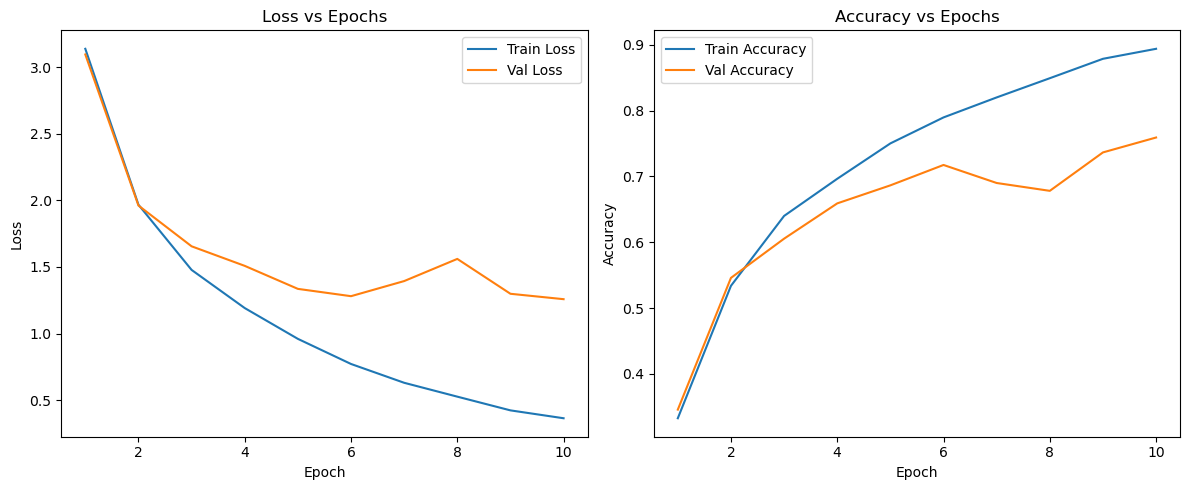

In [4]:
import os
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tqdm import tqdm

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Path
data_dir = r"C:\Users\riley\Documents\Project-Echo\src\Prototypes\data\spectrograms"

# Transforms (with augmentation)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Required for ResNet
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],  # ImageNet means
                         [0.229, 0.224, 0.225])  # ImageNet stds
])

# Dataset
full_dataset = datasets.ImageFolder(root=data_dir, transform=transform)
num_classes = len(full_dataset.classes)
print(f" Found {num_classes} classes | Total samples: {len(full_dataset)}")

# Split
total_len = len(full_dataset)
train_len = int(0.8 * total_len)
val_len = int(0.1 * total_len)
test_len = total_len - train_len - val_len
train_set, val_set, test_set = random_split(full_dataset, [train_len, val_len, test_len])

# Loaders
batch_size = 32
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size)
test_loader = DataLoader(test_set, batch_size=batch_size)

# Load pretrained ResNet18
model = models.resnet18(pretrained=True)

# Replace the final FC layer for your task
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

# Loss, optimizer, scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=2, factor=0.5)

# Evaluation
def evaluate(model, loader, criterion=None):
    model.eval()
    y_true, y_pred = [], []
    total_loss = 0.0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = outputs.argmax(1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            if criterion:
                total_loss += criterion(outputs, labels).item()
    accuracy = accuracy_score(y_true, y_pred)
    avg_loss = total_loss / len(loader) if criterion else None
    return accuracy, avg_loss

# Train
num_epochs = 10
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    y_true, y_pred = [], []

    start_time = time.time()
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", unit="batch")

    for images, labels in progress_bar:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(outputs.argmax(1).cpu().numpy())
        progress_bar.set_postfix({"Batch Loss": loss.item()})

    train_loss = running_loss / len(train_loader)
    train_acc = accuracy_score(y_true, y_pred)
    val_acc, val_loss = evaluate(model, val_loader, criterion)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    scheduler.step(val_acc)

    elapsed = time.time() - start_time
    ms_per_step = (elapsed / len(train_loader)) * 1000

    print(f"Epoch {epoch+1}/{num_epochs} — {int(elapsed)}s {int(ms_per_step)}ms/step — "
          f"accuracy: {train_acc:.4f} — loss: {train_loss:.4f} — "
          f"val_accuracy: {val_acc:.4f} — val_loss: {val_loss:.4f}")

# Final test
test_acc, test_loss = evaluate(model, test_loader, criterion)
print(f"\nFinal Test Accuracy: {test_acc:.4f} — Test Loss: {test_loss:.4f}")

# Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs+1), val_accuracies, label='Val Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.legend()

plt.tight_layout()
plt.show()



## Results Summary 
The ResNet18 model demonstrated strong performance across 269 animal sound classes. By the final epoch, it achieved **89.4% training accuracy**, **75.9% validation accuracy**, and a **final test accuracy of 73.8%**. The training loss consistently declined, while validation loss plateaued after an initial drop, indicating effective learning with slight overfitting toward the end.

Importantly, the model’s sustained accuracy after the dataset expansion provides clear evidence that the newly added sound samples have been successfully integrated. The consistent validation and test results suggest that the model continues to generalize well, even with the inclusion of additional species.




